# Lesson 3

In [1]:
import pandas as pd
import numpy as np

In [2]:
data = pd.read_csv('merged_clean_reduced.csv')
data.head()

,gender,median_home_val,ic2,ic3,avggift,target_d
0,M,1158.437751,430,466,28.000000,100.0
1,M,537.000000,415,410,5.666667,7.0
2,F,725.000000,340,361,4.111111,5.0
3,M,1158.437751,407,399,27.277778,38.0
4,F,995.000000,280,316,6.000000,5.0


In [3]:
data.shape

(3546, 6)

In [4]:
# Exploratory data analysis using matplotlib

In [7]:
!pip3 install seaborn if you need to
import matplotlib.pyplot as plt
import seaborn as sns 
%matplotlib inline

  Created wheel for need: filename=need-0.1-py3-none-any.whl size=1421 sha256=eea358c362bf573061a4c3d5d528c8631f7a551b6c6cd6df8eb2c209dd9f9ea3
  Stored in directory: /Users/patrickhutsch/Library/Caches/pip/wheels/69/c5/e7/6769496da779ae633f0f8418f983dc341e5ba281254ffd8ca4
  Created wheel for to: filename=to-0.3-py3-none-any.whl size=33555 sha256=bec94f92165e93a6b0ab4010e11d227a30f31299070884ccefe214b3be74ab81
  Stored in directory: /Users/patrickhutsch/Library/Caches/pip/wheels/ce/6b/1f/24a42b8bd904008551c329bf81e255614d4bd5689f8e50e793
Successfully built need to


In [9]:
data['gender'].value_counts()

F    2080
M    1466
Name: gender, dtype: int64

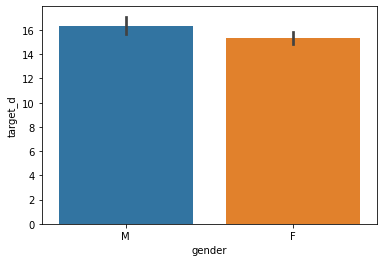

In [12]:
# everything can be a bar chart, but that is a sad sad world
sns.barplot(x="gender", y="target_d", data=data)
plt.show()

In [13]:
data['donated_big'] = data['target_d']>10
data.head()

,gender,median_home_val,ic2,ic3,avggift,target_d,donated_big
0,M,1158.437751,430,466,28.000000,100.0,True
1,M,537.000000,415,410,5.666667,7.0,False
2,F,725.000000,340,361,4.111111,5.0,False
3,M,1158.437751,407,399,27.277778,38.0,True
4,F,995.000000,280,316,6.000000,5.0,False


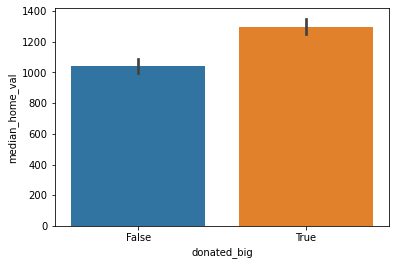

In [14]:
# everything can be a bar chart, but that is a sad sad world
sns.barplot(x="donated_big", y="median_home_val", data=data)
plt.show()

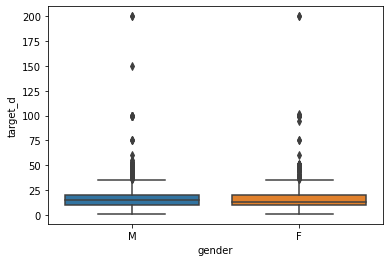

In [15]:
# boxplots are very powerful for EDA but you should never put one in front of a client
sns.boxplot(x = 'gender',y='target_d', data=data)
plt.show()

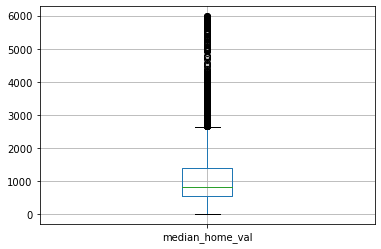

In [16]:
# for quick visualization somethime we do this without explicitly calling sns or plt 
data[['median_home_val']].boxplot()
plt.show()

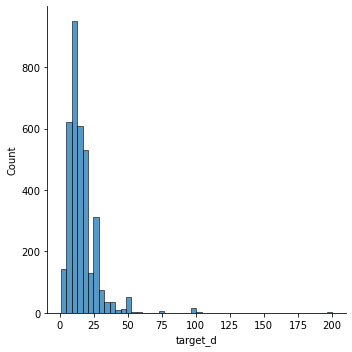

In [18]:
# distributions can shed a bit more light than boxplots, but are not as succint
sns.displot(data['target_d'], bins=50)
plt.show()

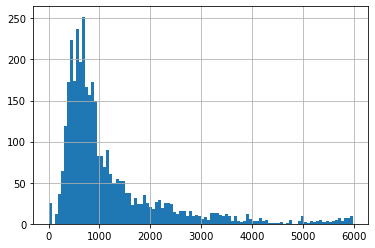

In [19]:
# for quick visualization
data['median_home_val'].hist(bins=100)
plt.show()

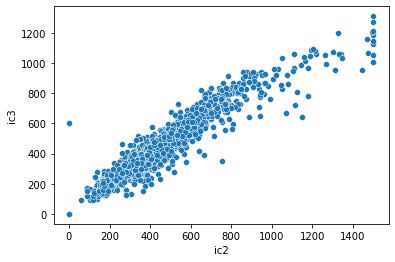

In [21]:
#scatterplots are great to compare two distinct variables and see if they are somehow related!
sns.scatterplot(x=data['ic2'], y=data['ic3'])
plt.show()

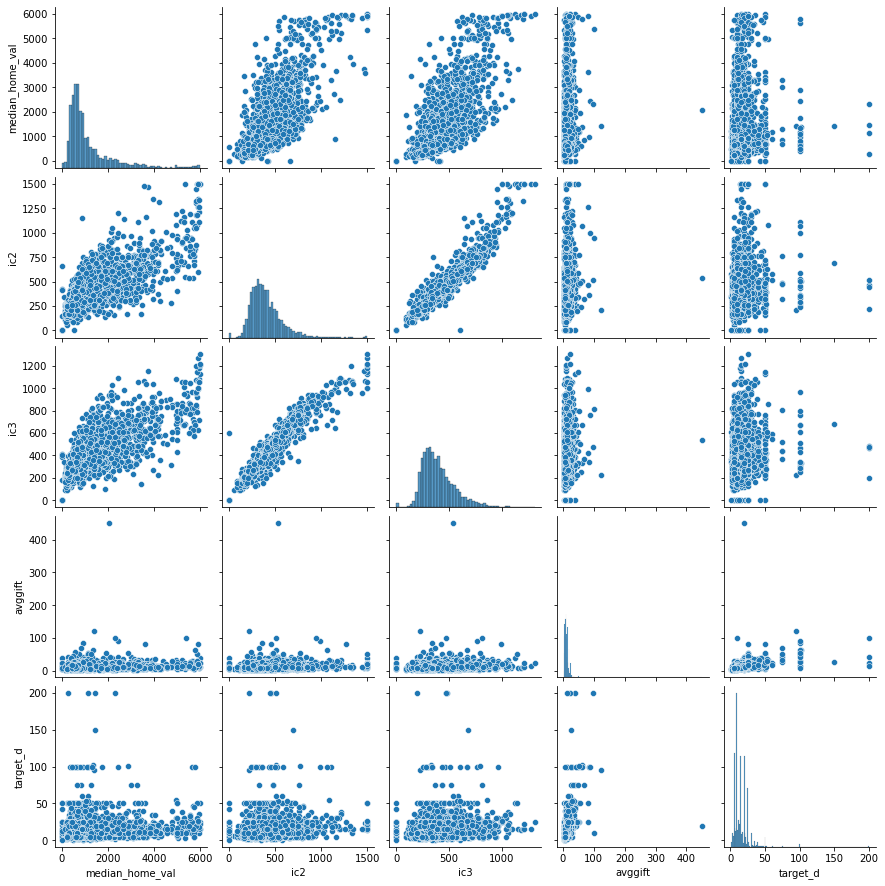

In [22]:
# the big bomb of Visual Data Anlysis
data=data.drop(['donated_big'], axis=1)
sns.pairplot(data)


In [23]:
#finally, some notions on correlation: is our dataset generally independent or are we seeing the same thing over and over?
# when not specified, always shows Pearson correlation
correlations_matrix = data.corr()
correlations_matrix

,median_home_val,ic2,ic3,avggift,target_d
median_home_val,1.000000,0.745089,0.737860,0.142251,0.114667
ic2,0.745089,1.000000,0.954224,0.136759,0.130352
ic3,0.737860,0.954224,1.000000,0.122955,0.119278
avggift,0.142251,0.136759,0.122955,1.000000,0.477150
target_d,0.114667,0.130352,0.119278,0.477150,1.000000


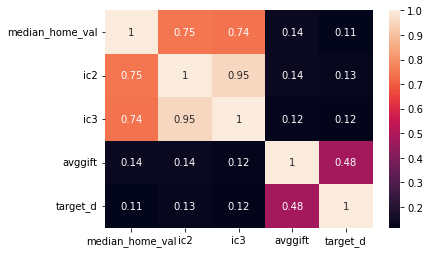

In [24]:
sns.heatmap(correlations_matrix, annot=True)
plt.show()

# Lesson 4

In [ ]:
#discussion on distributions + normal distribution

/Users/patrickhutsch/opt/anaconda3/lib/python3.9/site-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


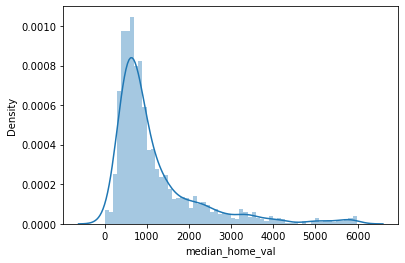

In [25]:
sns.distplot(data['median_home_val'], bins=60)
plt.show()

In [26]:
heights=[183,194,180,173,185,192,170,169,185,156,163,168,170,187,195,172,151,180,192,177,174,168,160,176,182,160,183,176,181,170,202]

shoe_size = [44,46,44,38,42,45,38,39,45,38,39,40,42,42,48,39,35,44,48,42,40,42,36,42,46,37,44,42,46,43,46]


/Users/patrickhutsch/opt/anaconda3/lib/python3.9/site-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


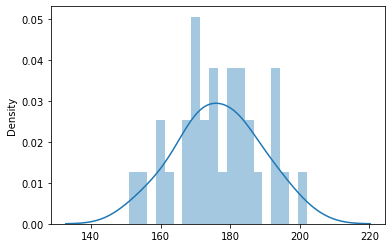

In [27]:
sns.distplot(heights,bins=20)
plt.show()

/Users/patrickhutsch/opt/anaconda3/lib/python3.9/site-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


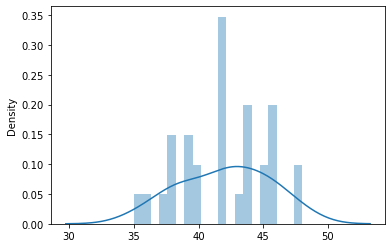

In [28]:
sns.distplot(shoe_size,bins=20)
plt.show()

In [ ]:
import random
throw_10000_dice = [random.randint(1,6) for i in range(10000)]
throw_10000_pairsofdice = [random.randint(1,6)+random.randint(1,6) for i in range(10000)]
throw_10000_triosofdice = [random.randint(1,6)+random.randint(1,6)+random.randint(1,6) for i in range(10000)]

In [ ]:
sns.distplot(throw_10000_dice)
plt.show()

In [ ]:
sns.distplot(throw_10000_pairsofdice)
plt.show()

In [ ]:
sns.distplot(throw_10000_triosofdice)
plt.show()

In [ ]:
np.random.randn(5)

In [ ]:
mu, sigma = 100, 50
x = mu + sigma * np.random.randn(500)

# the histogram of the data
sns.distplot(x,bins=50)
plt.show()

In [ ]:
mu, sigma = 100, 50
x = mu + sigma * np.random.randn(5000)
# the histogram of the data
sns.distplot(x,bins=50)
plt.show()

In [ ]:
mu, sigma = 100, 50
x = mu + sigma * np.random.randn(50000)
# the histogram of the data
sns.distplot(x,bins=500)
plt.show()

In [ ]:
# why is this distribution so important?
# occurs naturally
# single peak, symmetrical, tapers off

In [ ]:
#discussion back on shoe sizes, are they normally distributed?
shoe_size = [46, 44, 42, 37, 39, 42, 40, 39, 40, 44, 42, 40, 46]

sns.distplot(shoe_size,bins=20)
plt.show()